# Лабораторная работа 4: Генерация перестановок

In [10]:
import random
import time
import matplotlib.pyplot as plt

## Задача 1: Сгенерировать перестановки значений 1,…n,используя код Грэя.

In [6]:
def gray_code(n):
    return [i ^ (i >> 1) for i in range(1 << n)]

def generate_permutations(n):
    gray_codes = gray_code(n)
    permutations = []
    
    for code in gray_codes:
        permutation = []
        for i in range(n):
            # Получаем i-ый бит кода Грэя и добавляем соответствующее значение
            if (code >> i) & 1:
                permutation.append(i + 1)
        permutations.append(permutation)
    
    return permutations

# Пример использования
n = 3
permutations = generate_permutations(n)
print("Перестановки с использованием кода Грэя:")
for perm in permutations:
    print(perm)

Перестановки с использованием кода Грэя:
[]
[1]
[1, 2]
[2]
[2, 3]
[1, 2, 3]
[1, 3]
[3]


## Задача 2: Выполнить сравнительный анализ алгоритмов генерации случайных перестановок.


In [ ]:
def fisher_yates_shuffle(arr):
    """Алгоритм Фишера-Йетса для генерации случайной перестановки"""
    a = arr[:]
    n = len(a)
    for i in range(n - 1, 0, -1):
        j = random.randint(0, i)
        a[i], a[j] = a[j], a[i]
    return a

def random_permutation(arr):
    """Простая случайная перестановка с использованием random.sample"""
    return random.sample(arr, len(arr))

def compare_algorithms(n, iterations=1000):
    """Сравнительный анализ алгоритмов генерации случайных перестановок"""
    # arr = list(range(1, n + 1))
    
    # # Алгоритм Фишера-Йетса
    # start_time = time.time()
    # arr = list(range(1, n + 1))
    # for _ in range(iterations):
    #     fisher_yates_shuffle(arr)
    # fy_time = time.time() - start_time

    # # Простая случайная перестановка
    # start_time = time.time()
    # for _ in range(iterations):
    #     random_permutation(arr)
    # rp_time = time.time() - start_time

    # Простая случайная перестановка
    start_time = time.time()
    generate_permutations(n)
    cg_time = time.time() - start_time

    # return fy_time, rp_time, cg_time
    return cg_time
    # print(f"Время выполнения алгоритма Фишера-Йетса: {fy_time:.6f} секунд")
    # print(f"Время выполнения простой случайной перестановки: {rp_time:.6f} секунд")
    # print(f"Время выполнения генерации Грея: {cg_time:.6f} секунд")

# Пример использования
n = 20
result = []
for i in range(1, n+1):
    result.append(compare_algorithms(i))

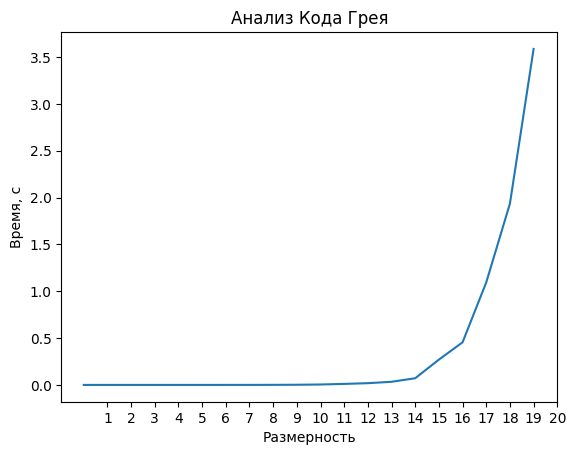

In [12]:
plt.title("Анализ Кода Грея")
plt.plot(result)
plt.ylabel("Время, с")
plt.xlabel("Размерность")
plt.xticks(range(1, n+1))
plt.show()